**Objetivo**

Faremos uma análise exploratória nos dados dos TOP 10 mais assistídos da Netflix em 2011.

**Descrição dos dados**

As of - Data  
Rank - Ranking  
Year to Date Rank - Rank Year to Date  
Last Week Rank - Rank na última semana  
Type - Tipo de programa  
Netflix Exclusive - Exclusico da Netflix  
Netflix Release Date - Data de lançamento na Netflix  
Days In Top 10 - Quantidade de dia no Top 10  
Viewership Score - Nota de 0 a 10 atribuída pela posição no ranking.

In [71]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
# Importando os dados do csv
df = pd.read_csv('netflix_daily_top_10.csv')

In [76]:
# Visualizando as 5 primeiras linhas
df.head()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55


In [35]:
# Quantidade de linhas e colunas
df.shape

(7100, 10)

In [36]:
# Tipos de dados
df.dtypes

As of                   object
Rank                     int64
Year to Date Rank       object
Last Week Rank          object
Title                   object
Type                    object
Netflix Exclusive       object
Netflix Release Date    object
Days In Top 10           int64
Viewership Score         int64
dtype: object

In [38]:
# Verificando valores nulos
df.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

**Descobrindo periodo de início e de fim da análise.**

In [57]:
df['As of'].min()

Timestamp('2020-04-01 00:00:00')

In [58]:
df['As of'].max()

Timestamp('2022-03-11 00:00:00')

Estudando os valores nulos

In [65]:
df.groupby('Netflix Exclusive').sum()

,Rank,Days In Top 10,Viewership Score
Netflix Exclusive,,,
Yes,23073,55584,407768


Então o valor NaN é para quando o programa não é exclusivo.

**Análizando os dados**

In [90]:
df.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


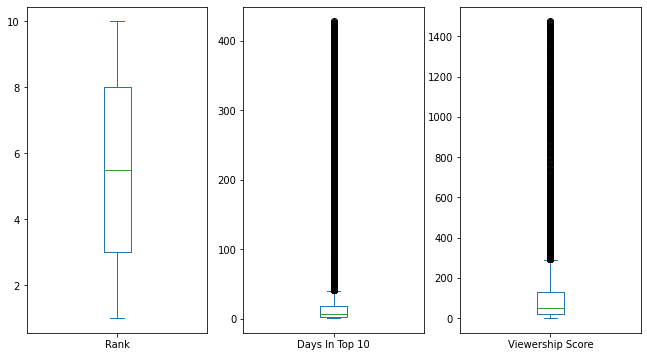

In [91]:
df.plot(kind = 'box', subplots = True, figsize = (11,6));

Podemos ver pelos gráficos que temos outliers. Vamos estudar isso mais a fundo, começando primeiramente pelos dados da coluna "Days In Top 10".

In [92]:
df[df['Days In Top 10'] >= 100]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2886,2021-01-14,7,6,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",100,287
2896,2021-01-15,7,7,10,Cocomelon,TV Show,NaN,"Jun 1, 2020",101,291
2909,2021-01-16,10,7,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",102,292
2919,2021-01-17,10,10,9,Cocomelon,TV Show,NaN,"Jun 1, 2020",103,293
3019,2021-01-27,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",104,294
...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",424,1466
6687,2022-01-29,8,5,8,Cocomelon,TV Show,NaN,"Jun 1, 2020",425,1469
6718,2022-02-01,9,-,7,Cocomelon,TV Show,NaN,"Jun 1, 2020",426,1471
6959,2022-02-25,10,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",427,1472


Podemos observar que o Tittle é o mesmo, isto é, o programa Cocomelon aparentemente faz muito sucesso na Netflix no periodo analisádo. Vamos estudar mais a fundo.

In [93]:
df.Title.value_counts()

Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: Title, Length: 645, dtype: int64

Como observado anteriormente, mas comprovado agora, a frequência com que o título Cocomelon aparece muito mais que os outros programas. 

**Vamos estudar a frequência dos programas da nossa base.**

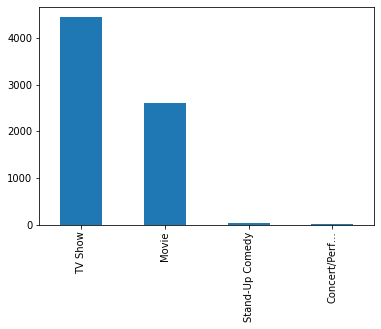

In [95]:
df.Type.value_counts().plot(kind='bar');

In [96]:
df.Type.value_counts()

TV Show            4446
Movie              2611
Stand-Up Comedy      41
Concert/Perf…         2
Name: Type, dtype: int64

Podemos ver que o TV Show tem maior frequência nos dados.

**Agora vamos estudar os dados e  da coluna "Viewership Score"**

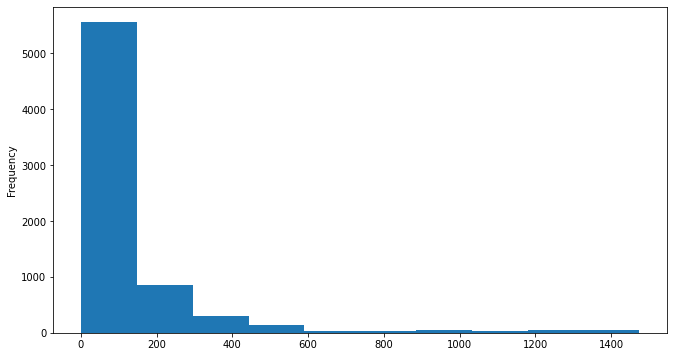

In [104]:
df['Viewership Score'].plot(kind = 'hist', subplots = True, figsize = (11,6));

In [108]:
df[df['Viewership Score'].max() == df['Viewership Score']]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,NaN,"Jun 1, 2020",428,1474


# Conclusão


Podemos ver que os TV Shows são de grande preferência pelo publico da Netflix e que o programa mais assistido e com maior ranking foi o TV Show Cocomelon ficando mais de um ano no TOP 10.